### Title: EDA and Feature Engineering  
Author: Yiran Jing

Date: 10-10-2018





#### Content:
- Clean outliers for price
For **price,** if price>400, clean/revalue it to 400, (0.013), should be fine, and based on the plot, these large price due to a special event, which model cannot know, and as it will not repeated happen in the future, so clean it
- Then generate new dataset

In [1]:
from collections import Counter
import pandas as pd
import csv
import pprint
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from collections import defaultdict
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas import Series
from matplotlib import pyplot
from time_series import ts_plot,ts_plot2,ts_plot3,acf_pacf_plot,hist,modify_time_format,epoch_seconds_to_timestamp
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import glob, os
from matplotlib import pyplot as plt
from time_series import plot_regressions,plot_time_decomposition,time_series_SA,time_series_weather_SA,group_holiday_plot,bonxcox_transf

In [2]:
power = pd.read_csv('../data/demand_temp_price.csv',)
#power.head()

### Clean price


🙂 Plot from 2017-03-09 12:30:00 to 2017-04-30 14:00:00


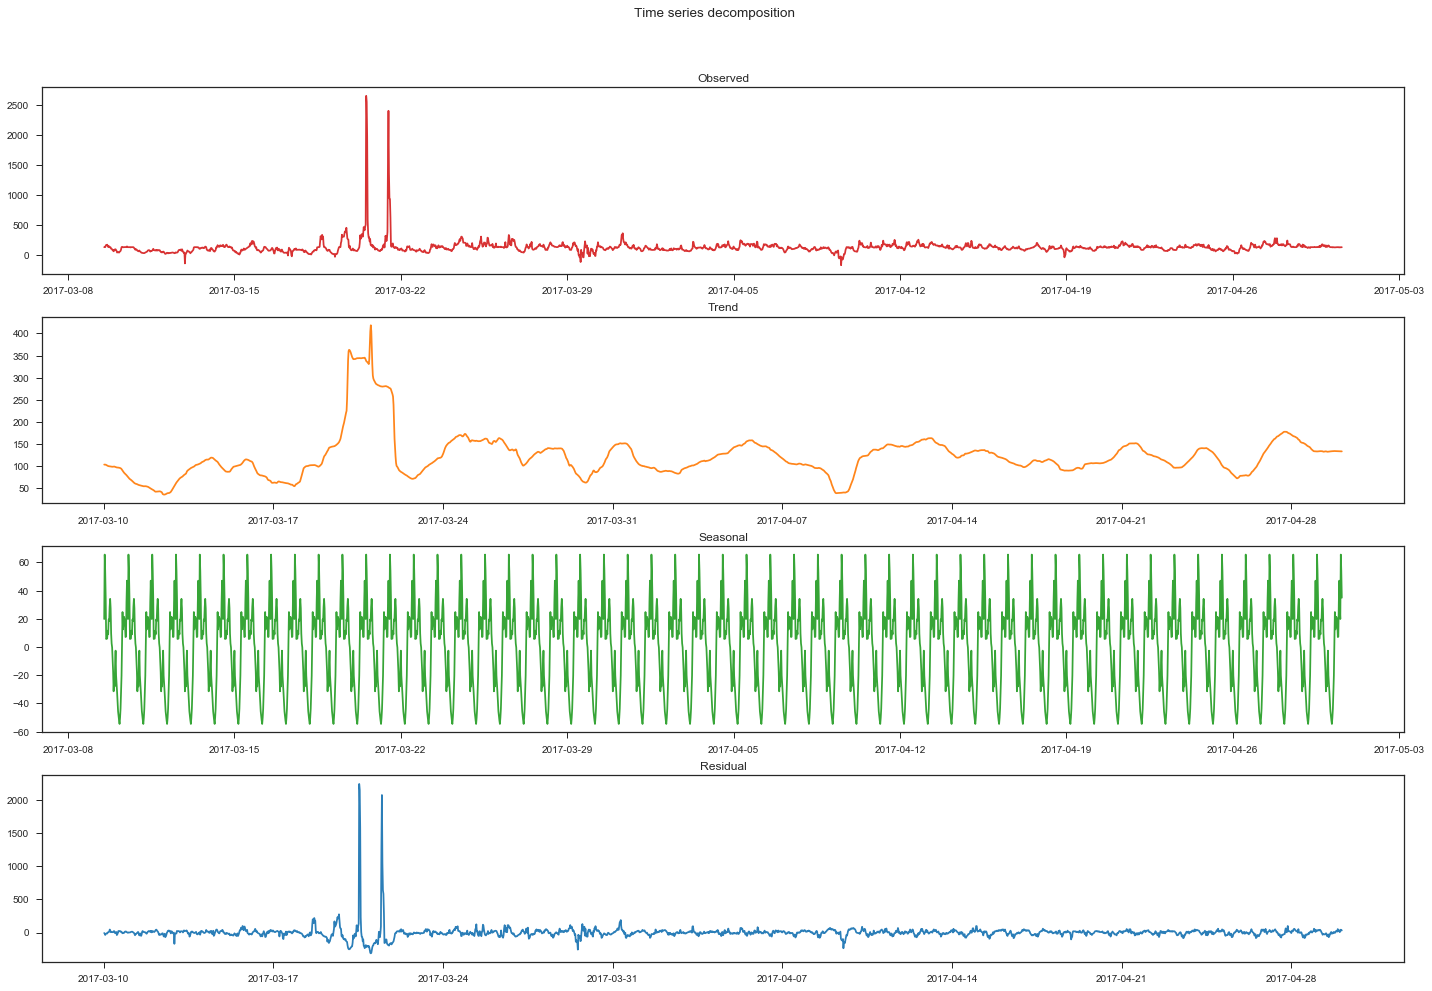

In [3]:
plot_time_decomposition(power, 2500,'price', 48, 'additive')

apparently outliers exist, so clean price

#### Clean outlier in price

based on the plot above, we treat ** price > 400 as outlier **, and replease it as 400

as the nnumer of outlier we clean is only 237, only **1.3%** observation (see cell below), so we think it is reasonable

In [4]:
# select subdataset that rows has outlier, based on the condition of query
power_outlier = power.query("price > 400")
print(len(power_outlier))

237


In [5]:
len(power_outlier)/len(power)

0.013542857142857143

In [6]:
def clear_data(data, data_outlier, variable, benchmark):
    """
    If price is more than 400, change it to 400 
    
    Parameter:
    -----------------------------
    data:
        the original dataset
    data_outlier: 
        the subsets inn which rows contain outliers
    variable:
        the column in dataset we want to clean
    benchmark:
        a number
        the value above I trade as outlier
    
    Output:
    --------------------------------
    data:
        which is the whole dataset, clean already
    """
    count = 0
    for i,r in power_outlier.iterrows():
        check = False
        for index, row in data.iterrows():
            if (str(r['period']) == str(row['period'])):
                check = True
                data.at[index, variable] = benchmark
                count +=1
            else:
                if check == True:
                    break
    print(count)
    return data

In [7]:
power = clear_data(power, power_outlier, "price", 400)

237



🙂 Plot from 2017-03-09 12:30:00 to 2017-04-30 14:00:00


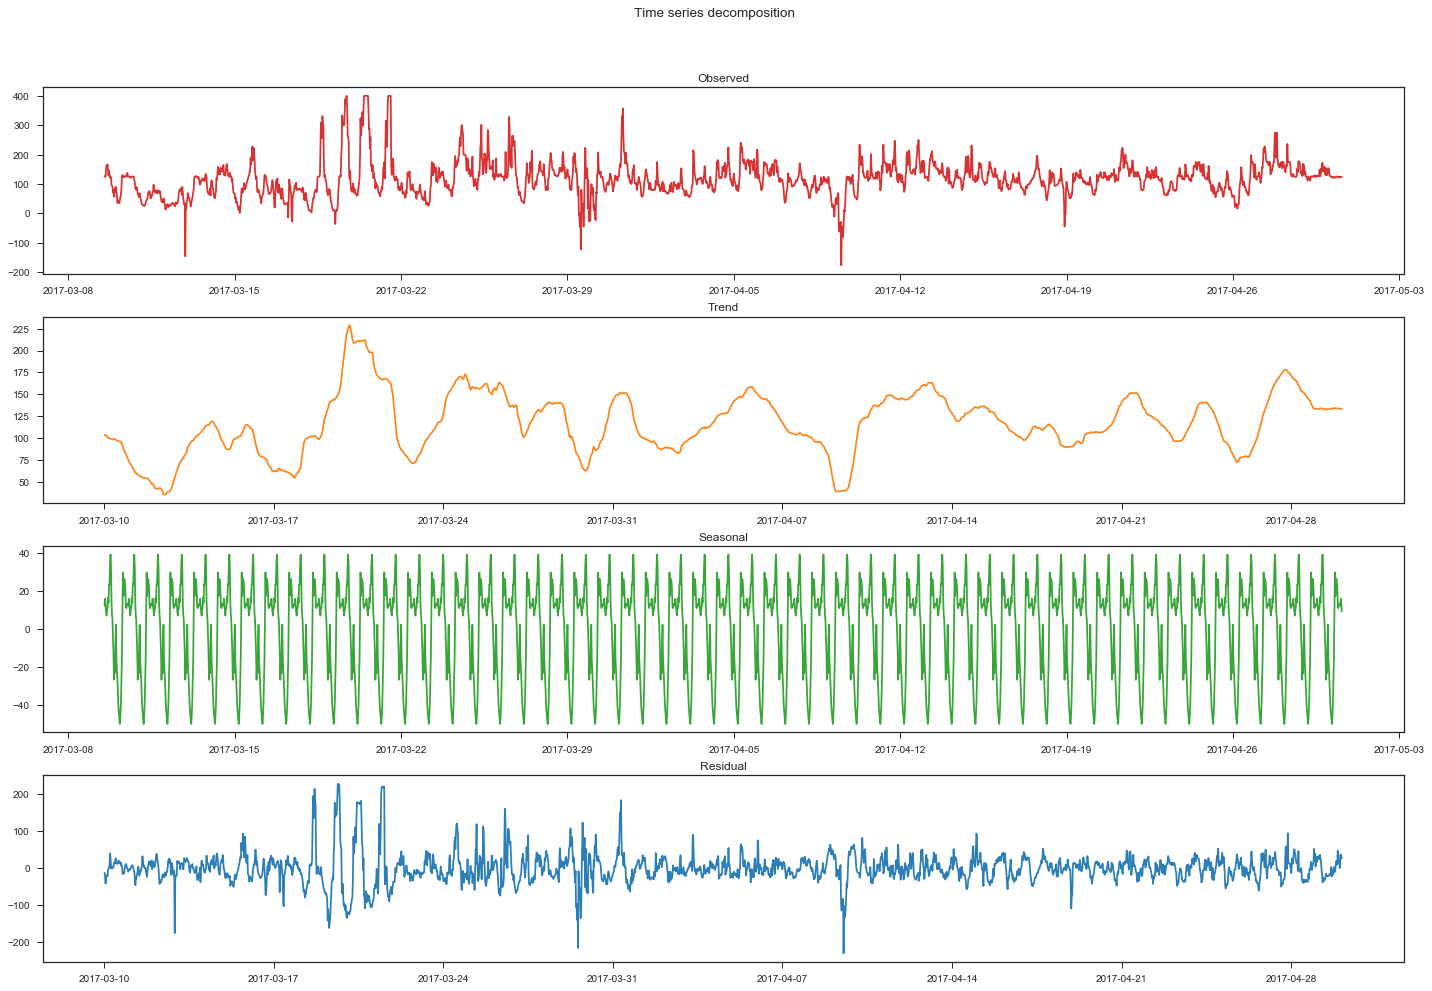

In [8]:
# replot to see the new data pattern
plot_time_decomposition(power, 2500,'price', 48, 'additive')

reasonable result! compare to the original data (The residuals seems like white noise! )

### Clean demand


🙂 Plot from 2017-03-09 12:30:00 to 2017-04-30 14:00:00


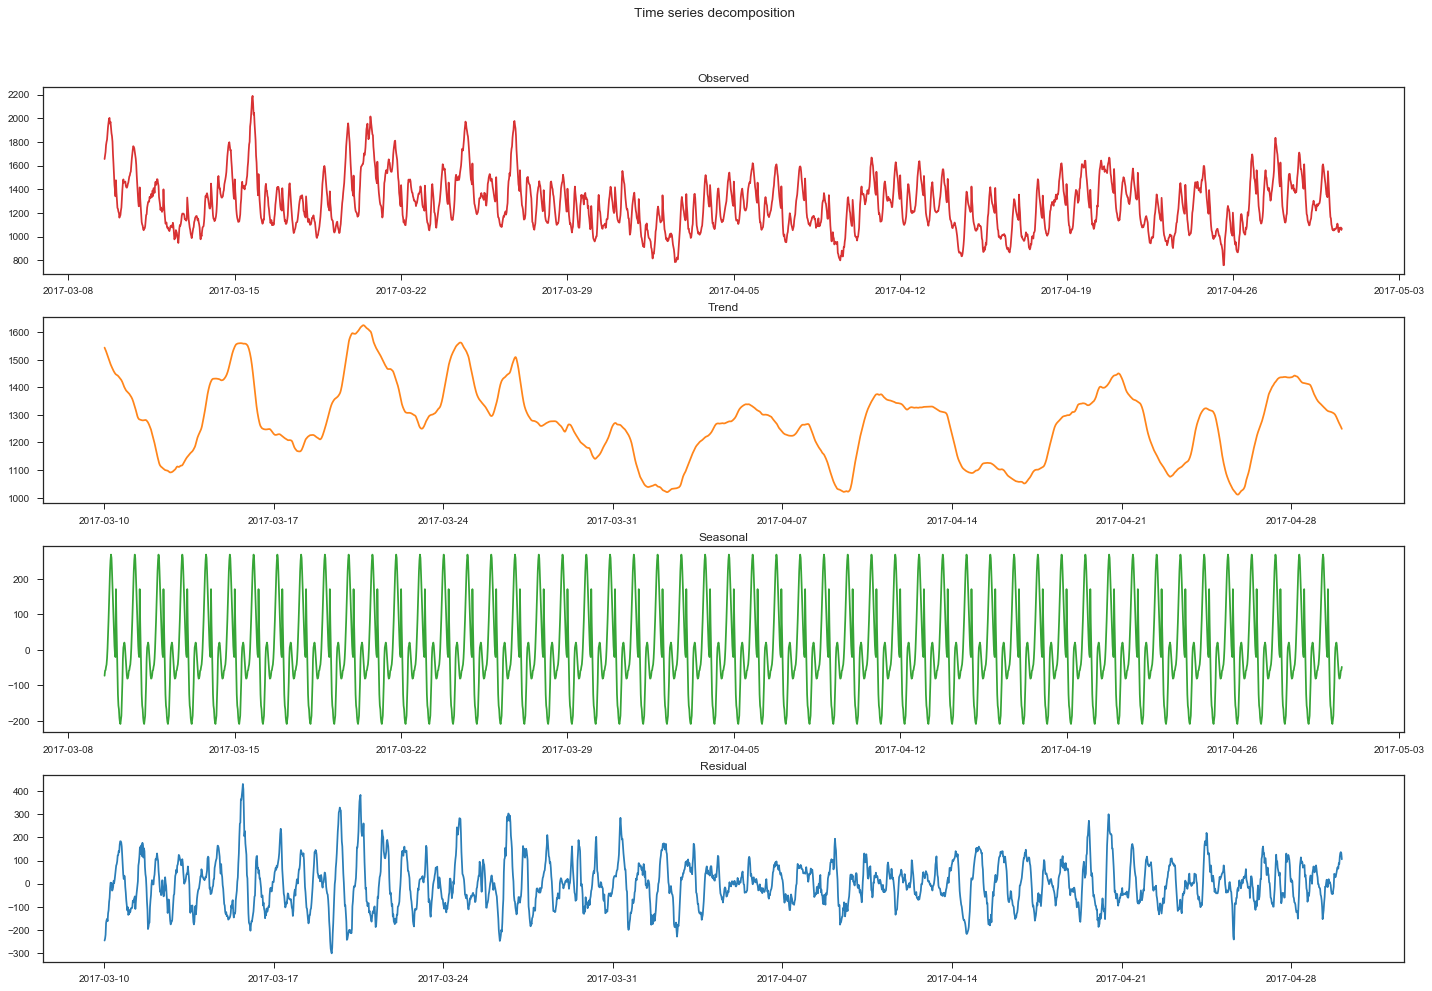

In [9]:
plot_time_decomposition(power, 2500,'demand', 48, 'additive')

apparent seasonal pattern!

In [10]:
# select subdataset that rows has outlier, based on the condition of query
demand_outlier = power.query("demand > 1900")
print(len(demand_outlier))

736


In [11]:
len(demand_outlier)/len(power)

0.042057142857142855

In [12]:
power = clear_data(power, demand_outlier, "demand", 1900)

237



🙂 Plot from 2017-03-09 12:30:00 to 2017-04-30 14:00:00


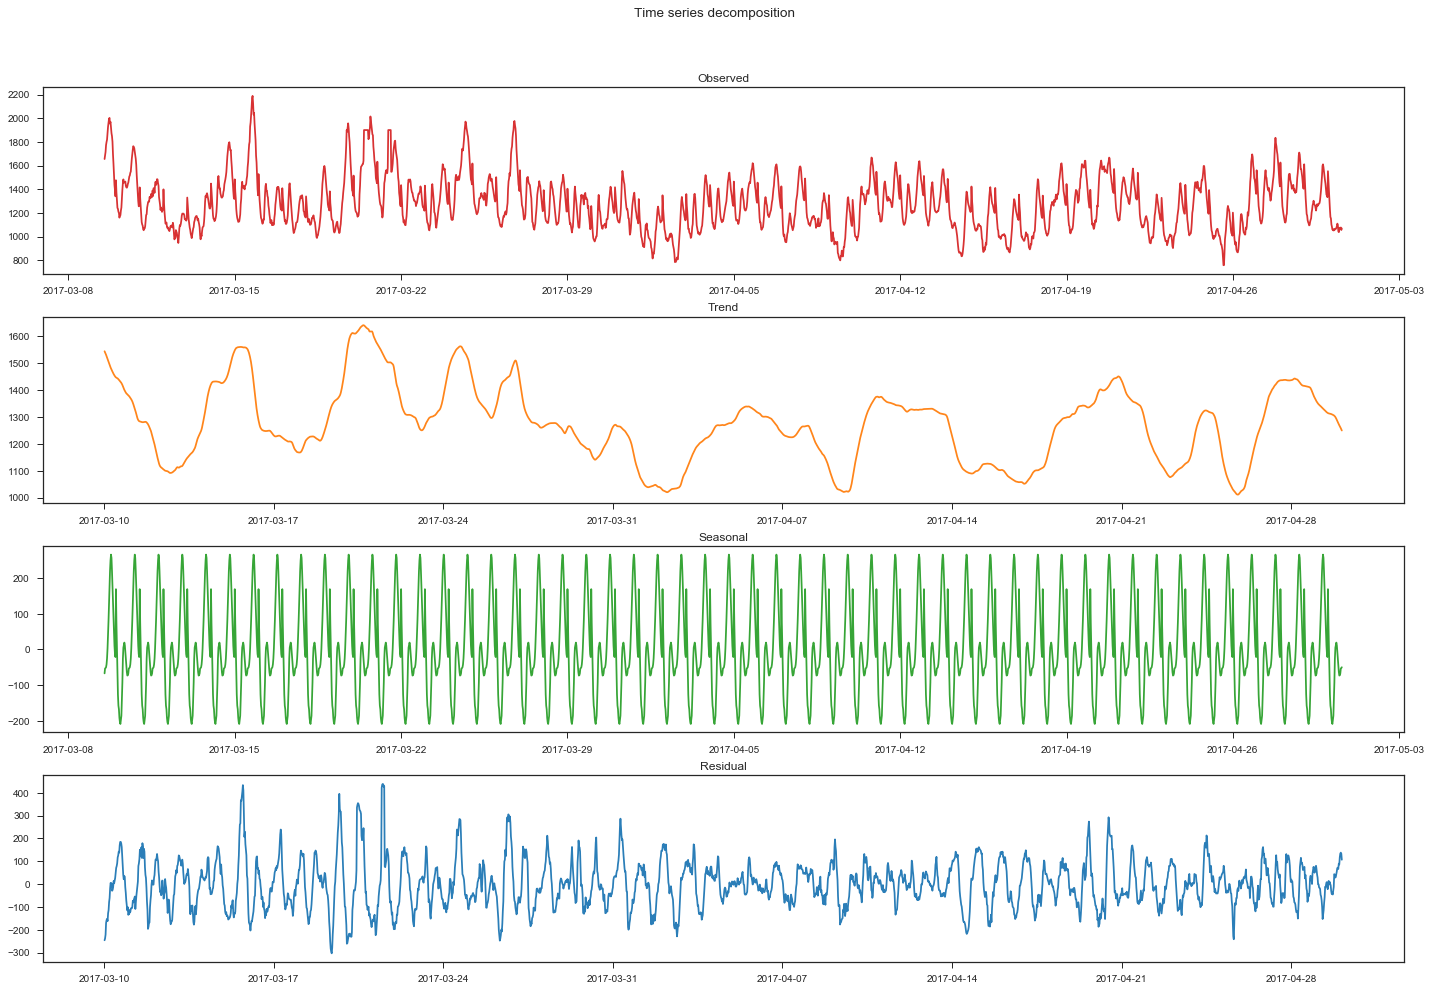

In [13]:
# replot to see the new data pattern
plot_time_decomposition(power, 2500,'demand', 48, 'additive')

### NEW data set
cleared demand and price

repeat step 1.1 and 1.2

In [14]:
power.to_csv('../data/clean_data_26_10_2018.csv',index = False)